Dataset 1 Preview:
                                           clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Dataset 1 Columns:  Index(['clean_text', 'category'], dtype='object')
Dataset 2 Preview:
    Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      15

<ipython-input-1-6478d07811d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset1, x='category', order=dataset1['category'].value_counts().index, palette='Set2')


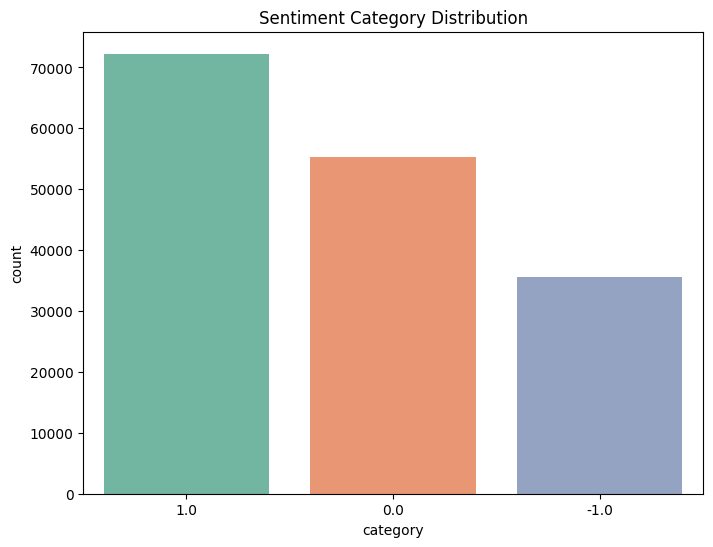


Training Model...

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.69      0.70      0.69      7102
         0.0       0.79      0.75      0.77     11042
         1.0       0.77      0.80      0.78     14450

    accuracy                           0.76     32594
   macro avg       0.75      0.75      0.75     32594
weighted avg       0.76      0.76      0.76     32594


Confusion Matrix:
 [[ 4941   757  1404]
 [  673  8280  2089]
 [ 1534  1392 11524]]

Accuracy Score:  0.7591888077560287
Unique Categories in Dataset 1:
 ['-1.0' '0.0' '1.0']




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud

dataset1 = pd.read_csv("T4_S1_TwitterData.csv")
dataset2 = pd.read_csv("T4_S2_apps.csv")

print("Dataset 1 Preview:\n", dataset1.head())
print("\nDataset 1 Columns: ", dataset1.columns)

print("Dataset 2 Preview:\n", dataset2.head())
print("\nDataset 2 Columns: ", dataset2.columns)

print("\nCleaning Dataset 1...")
dataset1 = dataset1.dropna(subset=['clean_text', 'category'])  # Drop rows with missing values
dataset1['category'] = dataset1['category'].astype(str).str.lower()
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset1, x='category', order=dataset1['category'].value_counts().index, palette='Set2')
plt.title("Sentiment Category Distribution")
plt.show()

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(dataset1['clean_text']).toarray()
y = dataset1['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Model...")
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))

print("Unique Categories in Dataset 1:\n", dataset1['category'].unique())

positive_words = " ".join(dataset1[dataset1['category'].str.contains('positive', case=False, na=False)]['clean_text'])
negative_words = " ".join(dataset1[dataset1['category'].str.contains('negative', case=False, na=False)]['clean_text'])

if not positive_words:
    print("\nWarning: No positive words found.")
if not negative_words:
    print("\nWarning: No negative words found.")

if positive_words:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title("Word Cloud for Positive Sentiment")
    plt.axis('off')
    plt.show()

if negative_words:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title("Word Cloud for Negative Sentiment")
    plt.axis('off')
    plt.show()
